In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
    # pip install seaborn (for line of best fit)
import csv
import matplotlib.pyplot as plt

In [2]:
# Load movie data from CSV file
movie_data = pd.read_csv('Resources/dataframe_v2.csv')
movie_data.head()

,Movie Title,Genre,Runtime (min),Box Office ($),Metacritic Rating,IMDb Rating,Release Year
0,Cinderella Swings It,"Comedy, Drama, Musical",69,NaN,NaN,6.5,1943
1,The Perfect Man,"Comedy, Family, Romance",100,"$16,535,005",27.0,5.4,2005
2,Out of the Depths,"Drama, War",61,NaN,NaN,5.3,1945
3,St. Elmo's Fire,"Drama, Romance",110,"$37,803,872",35.0,6.4,1985
4,Burn After Reading,"Comedy, Crime, Drama",96,"$60,355,347",63.0,7.0,2008


In [3]:
# Ensure that the data types are correct
movie_data['Release Year'] = movie_data['Release Year'].astype(int)
movie_data['Runtime (min)'] = pd.to_numeric(movie_data['Runtime (min)'], errors='coerce')

In [4]:
# Fill missing values in 'Runtime (min)' column with 0
movie_data['Runtime'] = movie_data['Runtime (min)'].fillna(0)

In [5]:
# Create bucket ranges for years
year_bins = range(movie_data['Release Year'].min(), movie_data['Release Year'].max() + 5, 5)
year_labels = [f'{bin_start}-{bin_end}' for bin_start, bin_end in zip(year_bins[:-1], year_bins[1:])]
movie_data['Year Range'] = pd.cut(movie_data['Release Year'], bins=year_bins, labels=year_labels)

In [6]:
# Convert runtime to hours and minutes format
# movie_data['Runtime (hrs:min)'] = movie_data['Runtime (min)'].apply(lambda x: f"{int(x / 60)}h {int(x % 60)}min")

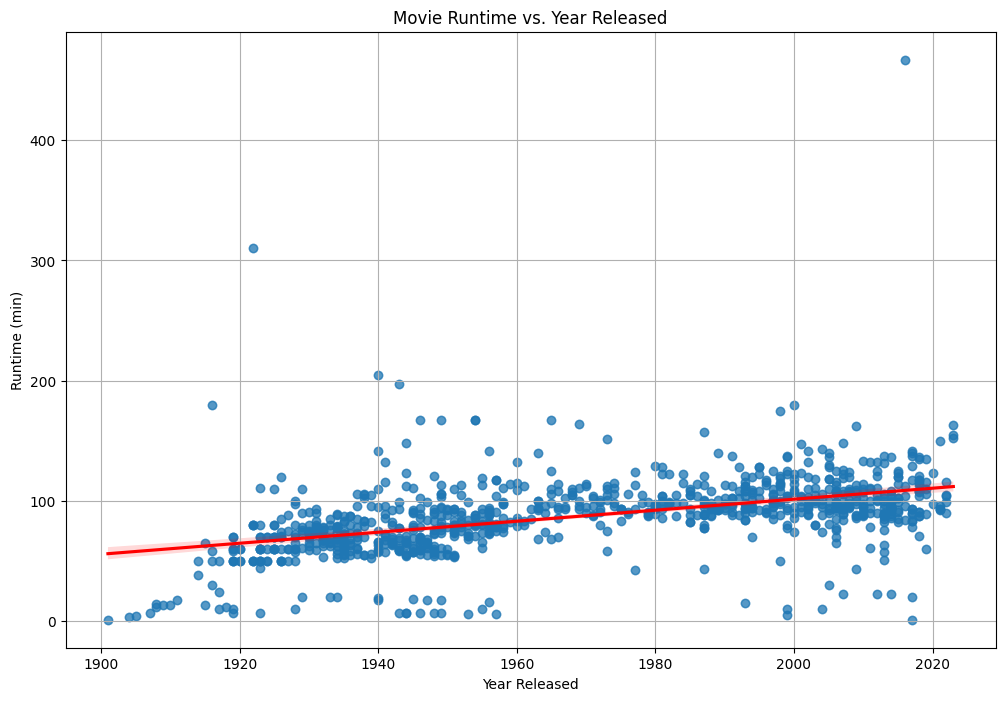

In [7]:
# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(movie_data['Release Year'], movie_data['Runtime (min)'], alpha=0.5)

# Fit a polynomial regression line (line of best fit)
sns.regplot(x='Release Year', y='Runtime (min)', data=movie_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

    # coefficients = np.polyfit(movie_data['Release Year'], movie_data['Runtime (min)'], 1)
    # polynomial = np.poly1d(coefficients)
    #plt.plot(movie_data['Release Year'], polynomial(movie_data['Release Year']), color='red', label='Line of Best Fit', zorder=1)

# design
plt.xlabel('Year Released')
plt.ylabel('Runtime (min)')
plt.title('Movie Runtime vs. Year Released')
plt.grid(True)
plt.savefig('scatter_plot.png')
plt.show()

# Save scatter
plt.show
plt.pause(0.1)

In [8]:
# Group the data by 'Release Year' and calculate the average runtime for each year
avg_runtime_by_year = movie_data.groupby('Release Year')['Runtime (min)'].mean()

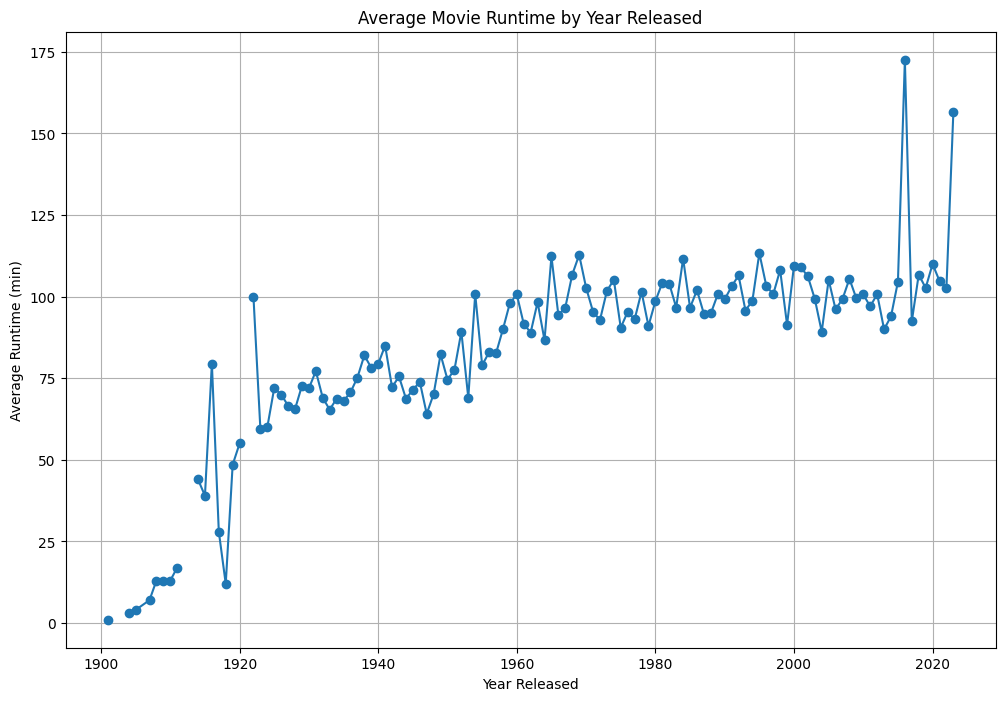

In [9]:
# Create line plot
plt.figure(figsize=(12, 8))
plt.plot(avg_runtime_by_year.index, avg_runtime_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year Released')
plt.ylabel('Average Runtime (min)')
plt.title('Average Movie Runtime by Year Released')
plt.grid(True)
plt.savefig('line_plot.png')
plt.show()

# Save line plot

plt.show()
plt.pause(0.1)